In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
input_path = '../data/cleaned_data.csv'
output_dir = '../output'
output_path = os.path.join(output_dir, 'unemployment_trend.png')

if not os.path.exists(input_path):
    raise FileNotFoundError(f'File {input_path} không tồn tại. Hãy kiểm tra lại đường dẫn.')

os.makedirs(output_dir, exist_ok=True)

In [ ]:
df = pd.read_csv(input_path, sep=',')

In [ ]:
selected_regions = ['Hà Nội', 'TP. Hồ Chí Minh', 'Đà Nẵng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Cửu Long']
df_filtered = df[df['Province_Region'].isin(selected_regions)]

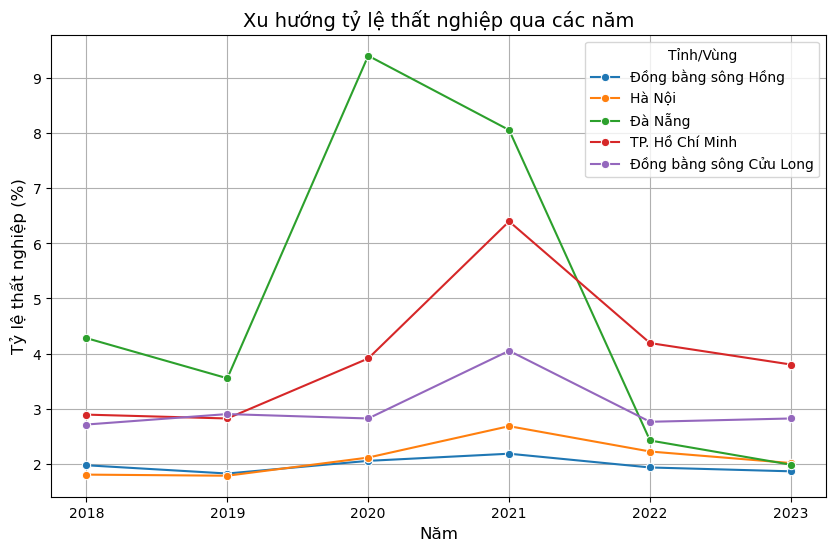

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='Unemployment_Rate', hue='Province_Region', marker='o')
plt.title('Xu hướng tỷ lệ thất nghiệp qua các năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.legend(title='Tỉnh/Vùng')
plt.grid(True)
plt.savefig(output_path, bbox_inches='tight')

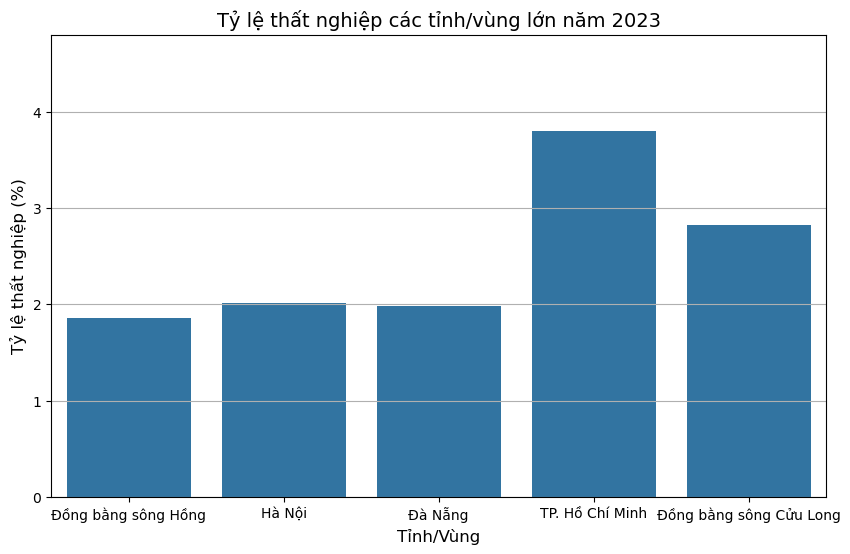

In [ ]:
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]
df_bar = df_latest[df_latest['Province_Region'].isin(selected_regions)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_bar, x='Province_Region', y='Unemployment_Rate')
plt.title(f'Tỷ lệ thất nghiệp các tỉnh/vùng lớn năm {latest_year}', fontsize=14)
plt.xlabel('Tỉnh/Vùng', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.ylim(0, df_bar['Unemployment_Rate'].max() + 1)
plt.grid(axis='y')
plt.savefig(os.path.join(output_dir, 'unemployment_bar_latest_year.png'), dpi=300, bbox_inches='tight')
plt.show()

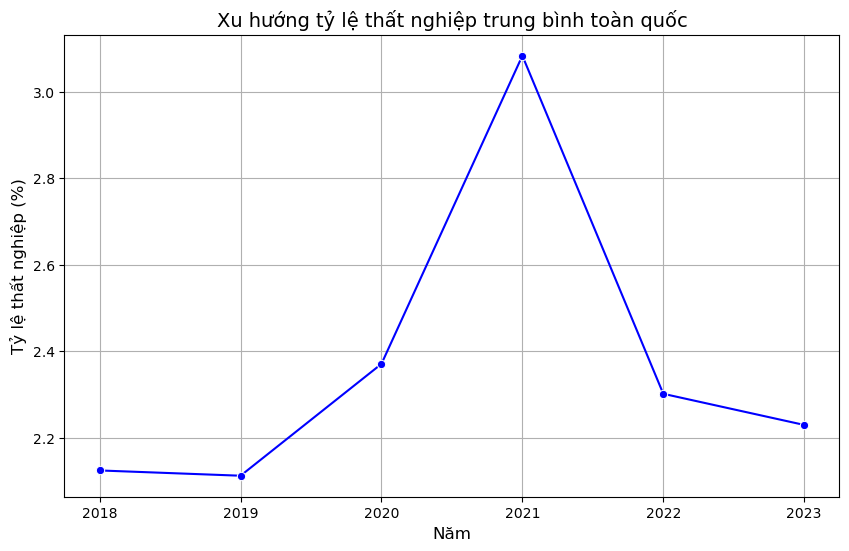

In [ ]:
avg_national = df.groupby('Year')['Unemployment_Rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_national, x='Year', y='Unemployment_Rate', marker='o', color='blue')
plt.title('Xu hướng tỷ lệ thất nghiệp trung bình toàn quốc', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'unemployment_trend_national.png'), bbox_inches='tight')
plt.show()

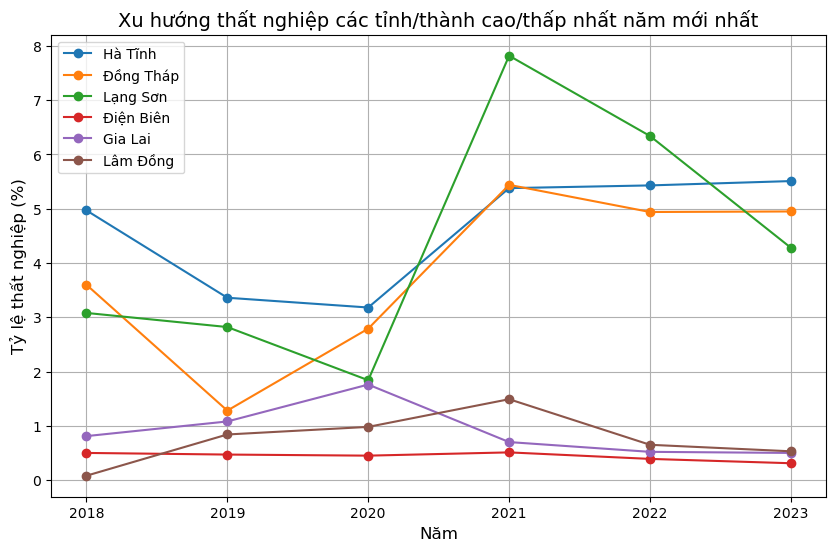

In [ ]:
# Tìm top 3 tỉnh/thành cao nhất và thấp nhất năm mới nhất
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]
top_high = df_latest.nlargest(3, 'Unemployment_Rate')['Province_Region']
top_low = df_latest.nsmallest(3, 'Unemployment_Rate')['Province_Region']
selected = pd.concat([top_high, top_low]).unique()

plt.figure(figsize=(10, 6))
for region in selected:
    data = df[df['Province_Region'] == region]
    plt.plot(data['Year'], data['Unemployment_Rate'], marker='o', label=region)
plt.title('Xu hướng thất nghiệp các tỉnh/thành cao/thấp nhất năm mới nhất', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'unemployment_line_top_regions.png'), bbox_inches='tight')
plt.show()